# Sanbox

## Test AR(1)

### Generate data from an AR(1)

In [1]:
import numpy as np

from scipy import stats


# Number of timestamps
n_samples = 1000


# AR(1) parameters
phi = .92
sigma2 = 1.

# Optional
random_seed: int = 42


# Generate the variances
rng = np.random.RandomState(random_seed)
epsilons = stats.norm(0, sigma2).rvs(n_samples, rng)

# Iterative timeseries
y = np.ones(n_samples)
y[0] = stats.norm(0, sigma2 / (1 - phi**2)).rvs(1, rng)[0]
for n in (np.arange(n_samples - 1) + 1):
    y[n] = phi * y[n - 1] + epsilons[n]

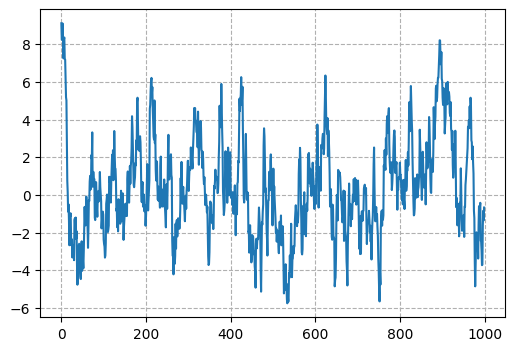

In [2]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(6, 4))
ax.grid(ls='--')

ax.plot(y)

### Fit a Bayesian AR(1) on the simulated data

#### Get the MLEs

In [3]:
from typing import Optional, Union


def rmse(pred: np.ndarray, actual: np.ndarray, axis: Optional[int] = None) -> Union[float, np.ndarray]:
    """
    Given the arrays of predicted and actual values, \
        compute the root mean square error.

    Parameters
    ----------
    pred: np.ndarray
        The array of predicted values.
    actual: np.ndarray
        The array of actual values.
    axis: int | None
        The axis along which the mean will be computed. \
        Aggregate all if None is passed.

    Returns
    -------
        float | np.ndarray
    """
    # Get the
    rmse = ((pred - actual)**2).mean()**(.5)

    return rmse

In [4]:
# Compute constants 
n_samp = len(y) - 1
n_dof = n_samp - 1
ind = np.arange(n_samp)

# Get the MLE for phi
phi_mle = (y[ind + 1] * y[ind]).sum() / (y[ind]**2).sum()
phi_mle

# Estimate the variance
pred = phi_mle * y[ind]  # predictions using phi_mle

s2 = ((y[ind + 1] - pred)**2).sum() / n_dof
v_mle = s2 * n_dof / n_samp

s2, v_mle

(0.9599474005504416, 0.9589864922415823)

#### Sample

In [5]:
from scipy import stats

# Nb of samples for Bayesian
ns_bayes = 5000

# First sample the sigmas
alpha = n_dof / 2
beta = s2 * n_dof / 2
v_samp = 1 / stats.gamma(alpha, scale=1 / beta).rvs(ns_bayes)
v_samp

array([0.93060177, 0.93811577, 0.94396782, ..., 0.92672303, 0.98766459,
       0.92471838])

In [6]:
sd = v_samp / y[1:].sum() 

In [7]:
phi_samp = stats.norm(phi_mle, sd).rvs(ns_bayes)

(array([  18.,   78.,  381.,  878., 1353., 1288.,  709.,  235.,   53.,
           7.]),
 array([0.91125132, 0.91323032, 0.91520933, 0.91718833, 0.91916733,
        0.92114633, 0.92312533, 0.92510433, 0.92708334, 0.92906234,
        0.93104134]),
 <BarContainer object of 10 artists>)

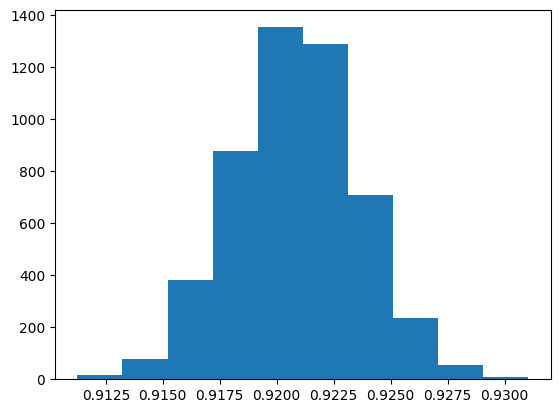

In [8]:
plt.hist(phi_samp)

In [9]:
phi_samp.mean()

0.920838767914874